In [1]:
import matplotlib.pyplot as plt
#from matplotlib import rc
import numpy as np
import scipy
import random
import math
# Dealing with networks
import networkx as nx
#import EoN = Epidemics on Networks
import EoN

In [2]:
# IF you dont have it installed, try this
#pip install EoN

## An epidemic on Karate Club

In [3]:
# Define the graph G
G = nx.karate_club_graph()

# Define the epidemic parameters
β = 0.05  # Infection rate
μ = 0.025  # Recovery rate

# Define the initial condition
I0 = set([0,1,2,3])

# Simulate the epidemic process with a fractiom rho infected at time 0
t, S, I, R = EoN.fast_SIR(G, β, μ, rho=0.1)

# Simulate the epidemic process starting from nodes in I0 infecteds
t, S, I, R = EoN.fast_SIR(G, β, μ, initial_infecteds=I0)

### S, I and R carry the total number of elements in each compartment.

In [94]:
S

array([30, 29, 28, 27, 26, 25, 24, 24, 23, 23, 23, 22, 21, 21, 20, 19, 18,
       17, 17, 16, 15, 15, 14, 13, 13, 13, 12, 11, 10,  9,  8,  8,  8,  8,
        7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6])

In [95]:
I

array([ 4,  5,  6,  7,  8,  9, 10,  9, 10,  9,  8,  9, 10,  9, 10, 11, 12,
       13, 12, 13, 14, 13, 14, 15, 14, 13, 14, 15, 16, 17, 18, 17, 16, 15,
       16, 15, 14, 13, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1,  0])

In [27]:
t

array([  0.        ,   0.27010575,   0.40639631,   1.50316179,
         3.94358254,   4.36467948,   4.47978281,   5.54409234,
         6.38253188,   6.58722384,   6.91351608,   7.49485397,
         8.44618546,   9.03505454,  11.2727962 ,  11.76942135,
        12.61538545,  13.17307466,  13.2862868 ,  13.73274788,
        14.08624455,  14.30209427,  15.30088718,  15.33340363,
        15.35915832,  15.93702342,  16.54869791,  17.19962901,
        17.88285213,  18.48370515,  20.80765211,  21.26086798,
        21.50229123,  22.23693986,  22.38794313,  25.45781011,
        29.95046479,  34.94012088,  35.21918967,  36.80695517,
        38.38786654,  42.0003513 ,  42.50383299,  42.6077944 ,
        44.71814756,  44.82836427,  46.23017892,  48.1312178 ,
        49.82394519,  52.21863033,  52.54453007,  58.90836418,
        61.30637433,  66.30749928,  66.370769  ,  67.05440337,
        69.0837879 ,  77.76118569,  80.60526188,  80.79076073,
        82.93908133,  84.82632869,  86.63046461,  94.43

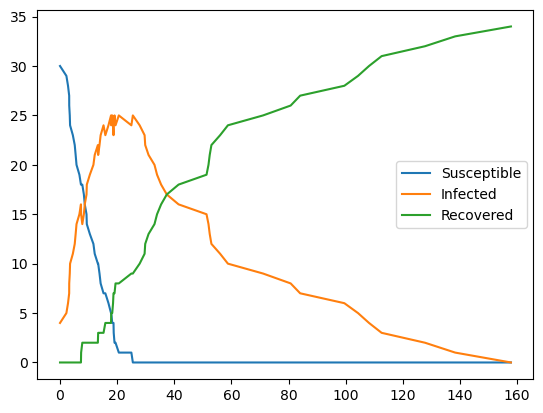

In [4]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.legend()
plt.show()

## Animating epidemics

In [5]:
# full data gives you the state of each node in time
sim = EoN.fast_SIR(G, β, μ, initial_infecteds=I0, return_full_data=True) 
sim

MovieWriter ffmpeg unavailable; using Pillow instead.


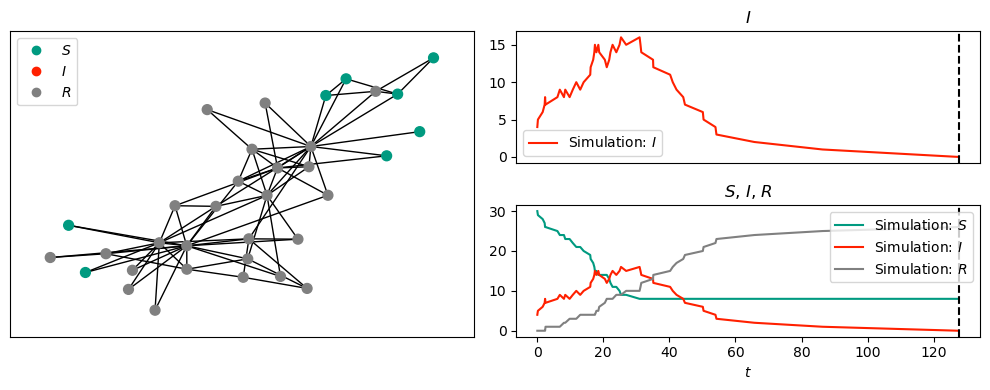

In [6]:
ani=sim.animate(ts_plots=['I', 'SIR'], node_size = 50)
#ani.save('SIR_KarateClub.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
ani.save('SIR_KarateClub.gif', fps=5)

## Epidemics on a lattice

In [7]:
# This is very cool. Node names do not need to be numbers, they can be texts, and also pairs of numbers (x,y)
# Here you create a lattice by naming each node (u,v) where 0<=u,v<=99
G = nx.grid_2d_graph(100,100) 
# See the firsts nodes
list(G.nodes)[0:10]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9)]

MovieWriter ffmpeg unavailable; using Pillow instead.


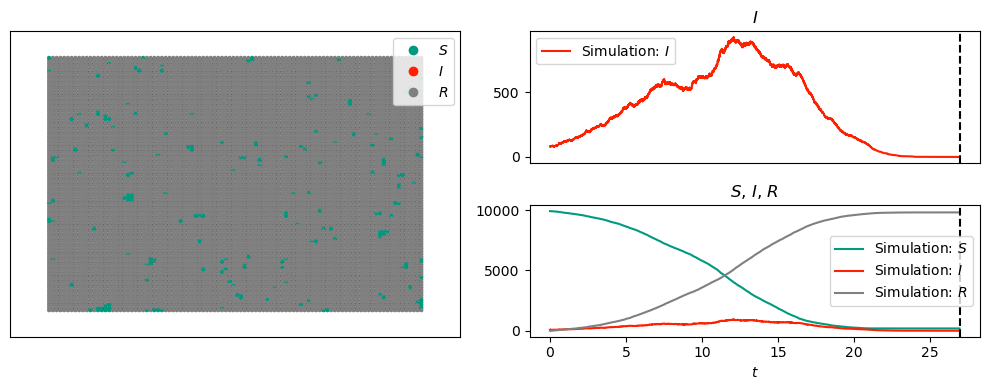

In [21]:
G = nx.grid_2d_graph(100,100) #each node is (u,v) where 0<=u,v<=99

#we'll initially infect those near the middle
initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]

pos = {node:node for node in G}  # this is also cool. To fix their positions in space is enough 
                                 # to build a dictionary with the the coordinate of each node.
                                 # Since the nodes are named with their own coordinates, the dictionary is
                                 # { node:node  .. }
sim_kwargs = {'pos': pos}

β = 2.0
μ = 1.0 
sim = EoN.fast_SIR(G,  # the graph 
                   β,  # infection rate
                   μ,  # recovery rate
                   initial_infecteds = initial_infections, # where does the epidemic starts
                   tmax = 40,   # simulation time
                   return_full_data=True, # return states of all nodes in time, not only the compartments totals.
                   sim_kwargs = sim_kwargs)

ani=sim.animate(ts_plots=['I', 'SIR'], node_size = 4)
#ani.save('SIR_2dgrid.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

# If you are in windows, maybe this works better
ani.save('SIR_2dgrid.gif', fps=5)


## Generating random networks with from given degree distribution

We frist show how to use NetworkX to build a graph with a certain set of degrees, specified in a list.

Then we program a function to generate that list of degrees from a given probability distribution, and build the graph.

We check that the actual histogram of the graph generated has a profile similar to the analytical probability distribution given, in this case, a Poisson distribution (Erdos-Renyi graphs)

In [8]:
ks = [1,3,5,5,3,3,3,3]
sum(ks)

26

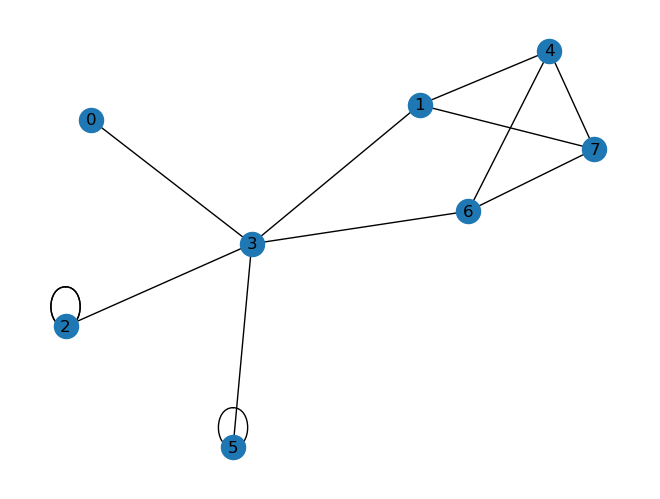

In [9]:
G = nx.configuration_model(ks)

# Draw the graph with node color based on the club attribute
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

Run this a second time, to see that the graph generated is different. Each node has the same degree, but is connected to different neighbors.

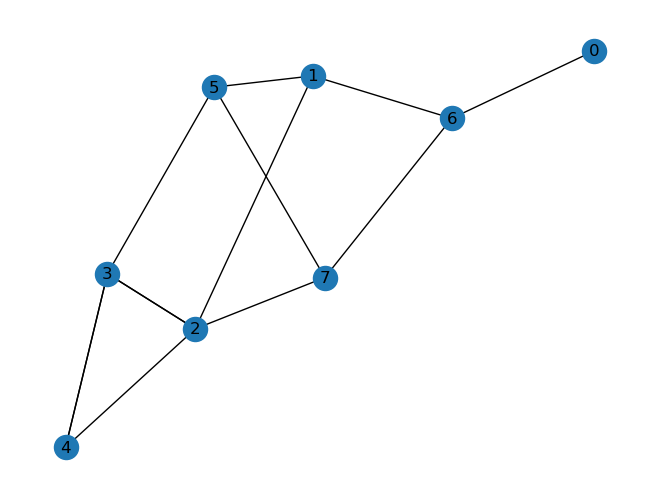

In [10]:
G = nx.configuration_model(ks)

# Draw the graph with node color based on the club attribute
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

## Generate networks with a given degree probability

In [11]:
# Generates a random network from a given degree Probability profile
def generate_network(Pk, N, ntries = 100):
    r'''Generates an N-node random network whose degree distribution is given by Pk'''
    counter = 0
    while counter< ntries: # Attempts many times, if the sum(ks) is not even
        counter += 1
        ks = []
        for ctr in range(N):
            ks.append(Pk()) # Defines the degrees for each node
        if sum(ks)%2 == 0:  # Go outside the loop the first time you get a valid sequence of degrees
            break
    
    if sum(ks)%2 ==1: # In case you never found a valid sequence
        raise EoN.EoNError("cannot generate even degree sum")
        
    # If you did find a valid sequence, return the corresponding random graph
    G = nx.configuration_model(ks)
    return G


### Creating a Poissonian distribution

In [12]:
def PkPoisson(): # this function returns random regular numbers ditributed as Poisson, 
                 # with expected value target_k
    return np.random.poisson(target_k)

In [13]:
# Try it many times
np.random.poisson(5.0)

2

## Testing that it is Poissonian $P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$

A Poisson degree profile is typical for Erdos-Renyi graph. Next we compare the experimental degree frequency in a graph generated with a Poisson profile, and the actual Poisson distribution.

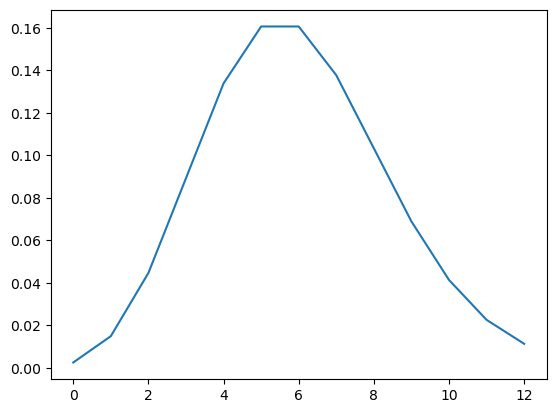

In [189]:
target_k = 6 # mean value of the degree

# The real Poisson distribution
poislist = np.array([ target_k**(i)*np.exp(-target_k)/math.factorial(i)  for i in range(0,13)])
plt.plot(range(0,13),poislist)

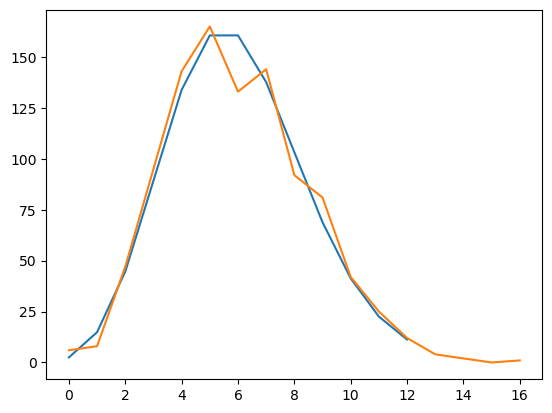

In [190]:
N=1000

# Calls the function we defined before
G = generate_network(PkPoisson,N)

# This two plots should be similar

plt.plot(N*poislist)
plt.plot(nx.degree_histogram(G))

In [15]:
def PkPoisson():
    return np.random.poisson(target_k)

#a regular (homogeneous) network has a simple generating function.
def PkHomogeneous():
    return target_k

#The following 30 - 40 lines or so are devoted to defining the degree distribution
#and the generating function of the truncated power law network.

#defining the power law degree distribution here:
assert(target_k==6) #if you've changed target_k, then you'll
                #want to update the range 1..61 and/or
                #the exponent 1.5.

PlPk = {}
exponent = 1.5
kave = 0
for k in range(1,61):
    PlPk[k]=k**(-exponent)
    kave += k*PlPk[k]

normfactor= sum(PlPk.values())
for k in PlPk:
    PlPk[k] /= normfactor

def PkPowLaw():
    r = random.random()
    for k in PlPk:
        r -= PlPk[k]
        if r<0:
            return k
#End of power law network properties.

Checking that the mean values of the distributions are correct (near target_k)

In [16]:
# sample mean of the Poisson distribution
print("expected: ",target_k," experimental: ",  np.mean([PkPoisson() for i in range(1000)]))

expected:  6  experimental:  5.975


In [17]:
# sample mean of the Scale Free distribution
# it is expected to fluctuate more than the Poisson one
np.mean([PkPowLaw() for i in range(1000)])

6.47

## Have a look at these three networks types

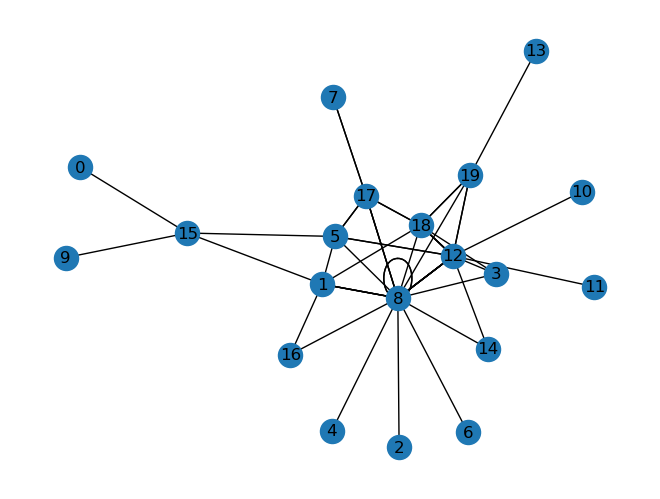

In [18]:
# Scale free network
G = generate_network(PkPowLaw, 20)
nx.draw(G, with_labels=True)
plt.show()

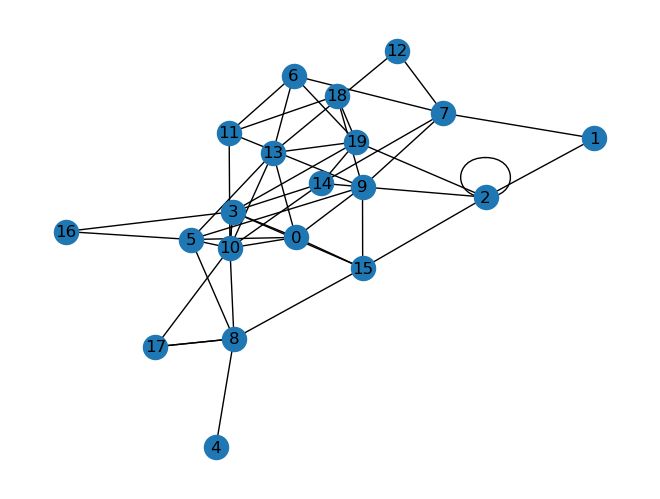

In [19]:
# Erdos Renyi graph
G = generate_network(PkPoisson, 20)
nx.draw(G, with_labels=True)
plt.show()

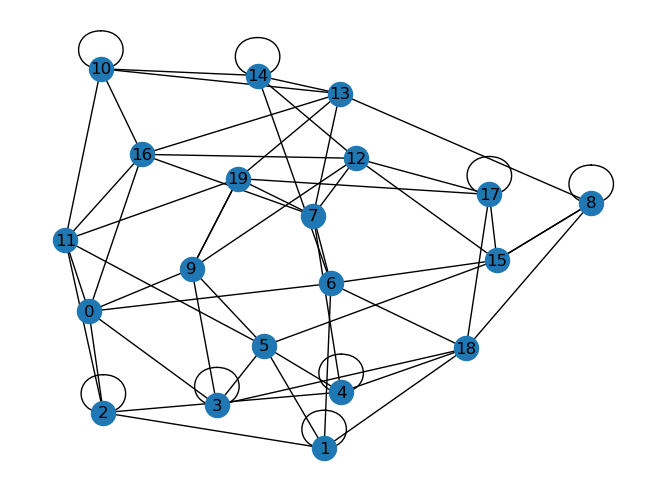

In [20]:
# Regular graph
G = generate_network(PkHomogeneous, 20)
nx.draw(G, with_labels=True)
plt.show()

## Run many SIR simulations, and compute their average

In [63]:
def process_degree_distribution(N, Pk, color, count, Tmax,variance=True,plot=True):
    
    report_times = (Tmax/100.0)*np.array(range(100)) # used to generate regular time-interval sequences
    
    sums = 0*report_times # used to compute the average
    space_1=str(Pk).index(' ')
    space_2=str(Pk).index(' ',12)
    namePk=str(Pk)[space_1+1:space_2]
    
    for cnt in range(count):    # Do many simulations
        
        G = generate_network(Pk, N)
        
        t, _, I, _ = EoN.fast_SIR(G, β, μ, rho=rho)
        
        # Plot Each simulation, but almos transparent alpha=0.1
        if variance:
            if plot:
                plt.plot(t, I*1./N, '-', color = color, alpha = 0.1, linewidth=1)  
        
        subsampled_I = EoN.subsample(report_times, t, I)  # Make a sequence of I values, at regular times steps
        sums += subsampled_I*1./N                         # Add all I series, to make an average at the end.
    
    ave = sums/count   # Compute the average of all simulations.
    if plot:
        plt.plot(report_times, ave, color = color, label=namePk)
    return report_times, ave

In [44]:
def process_degree_distribution_initinf(N, Pk, color, count, Tmax,variance=True):
    
    report_times = (Tmax/100.0)*np.array(range(100)) # used to generate regular time-interval sequences
    
    sums = 0*report_times # used to compute the average
    space_1=str(Pk).index(' ')
    space_2=str(Pk).index(' ',12)
    namePk=str(Pk)[space_1+1:space_2]
    
    for cnt in range(count):    # Do many simulations
        
        G = generate_network(Pk, N)
        nodelist = G.nodes()
        Y0 = np.array([1 if node<10 else 0 for node in nodelist]) # First 10 nodes, are infected with probability 1, 
                                                          # the rest with probability 0
        X0 = np.array(nodelist)[Y0==1] 
        
        t, _, I, _ = EoN.fast_SIR(G, β, μ, initial_infecteds = X0)
        
        # Plot Each simulation, but almos transparent alpha=0.1
        if variance:
            plt.plot(t, I*1./N, '-', color = color, alpha = 0.1, linewidth=1)  
        
        subsampled_I = EoN.subsample(report_times, t, I)  # Make a sequence of I values, at regular times steps
        sums += subsampled_I*1./N                         # Add all I series, to make an average at the end.
    
    ave = sums/count   # Compute the average of all simulations.
    plt.plot(report_times, ave, color = color, label=namePk)
    return report_times, ave

In [22]:
# Defining the parameters

colors = ['#ff7851','#6cc3d5','#56cc9d','#E69A00', '#CD9AB3', '#0073B3',
        '#F0E442']

rho = 0.025   # Fraction of the system that start infected at t=0
target_k = 6  # the mean value of the degree, in all three distributions
N = 1000     # the size of the networks
β = 0.5       # link transmission rate
μ = 1.        # node recovery rate
count = 20    # number of simulations to run for each


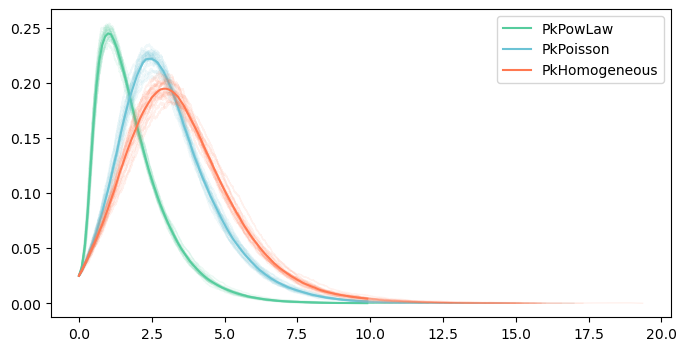

In [68]:
plt.figure(figsize=(8,4))

#Scale Free graph (Powerlaw)
process_degree_distribution(N, PkPowLaw, colors[0], count,10.0)

#Erdos Renyi graph (Poisson distribution)
process_degree_distribution(N, PkPoisson, colors[1],  count, 10.0)

#Regular network
process_degree_distribution(N, PkHomogeneous, colors[2],  count, 10.0)
plt.legend()
plt.show()

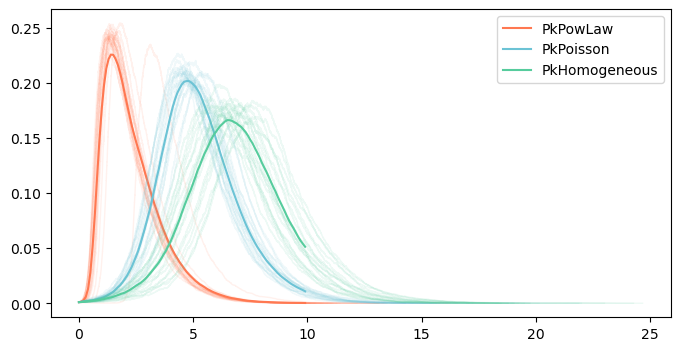

In [76]:
plt.figure(figsize=(8,4))

#Scale Free graph (Powerlaw)
process_degree_distribution_initinf(N, PkPowLaw, colors[0], count,10.0)

#Erdos Renyi graph (Poisson distribution)
process_degree_distribution_initinf(N, PkPoisson, colors[1],  count, 10.0)

#Regular network
process_degree_distribution_initinf(N, PkHomogeneous, colors[2],  count, 10.0)
plt.legend()
plt.show()

## Comparing to mean field solutions

C:\anaconda\lib\site-packages\EoN\analytic.py:1264: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


KeyboardInterrupt: 

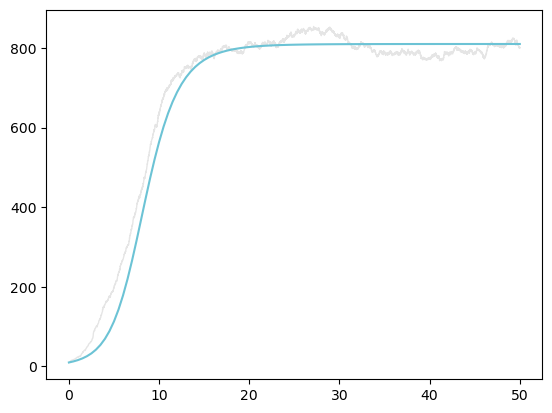

In [81]:
# Erdos Renyi
N=100
G = generate_network(PkPoisson, N)
β=0.1
μ=0.1

nodelist = G.nodes()
Y0 = np.array([1 if node<10 else 0 for node in nodelist]) # First 10 nodes, are infected with probability 1, 
                                                          # the rest with probability 0
X0 = np.array(nodelist)[Y0==1] 

t, S, I= EoN.fast_SIS(G, β, μ, initial_infecteds = X0, tmax=50)
#Plot Each simulation, but almos transparent alpha=0.1
plt.plot(t, I, '-', color = 'k', alpha = 0.1, linewidth=1)  
#process_degree_distribution_initinf(N, PkPoisson, colors[2],  101, 50)

# Numerical integration of Master Equation with Pair based approximation
t, S, I = EoN.SIS_individual_based(G, β, μ, nodelist=nodelist, Y0 = Y0, tmax = 50, tcount = 101)
plt.plot(t,I,colors[1])

# Numerical integration of Master Equation with Pair based approximation
t, S, I = EoN.SIS_pair_based(G, β, μ, nodelist=nodelist, Y0 = Y0, tmax = 50, tcount = 101)
plt.plot(t,I,colors[3])

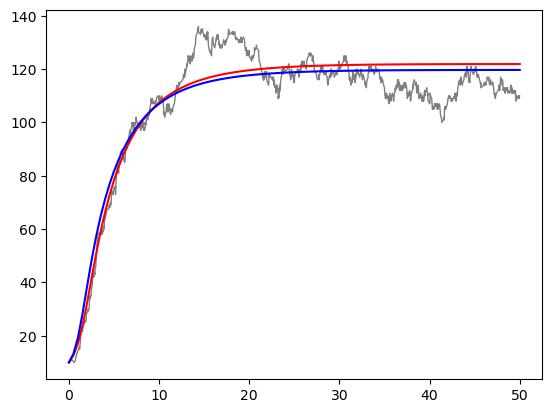

In [61]:
# Scale free network
N=200
G = generate_network(PkPowLaw, N)
β=0.1
μ=0.1

nodelist = G.nodes()
Y0 = np.array([1 if node<10 else 0 for node in nodelist]) # First 10 nodes, are infected with probability 1, 
                                                          # the rest with probability 0
X0 = np.array(nodelist)[Y0==1] 

t, S, I= EoN.fast_SIS(G, β, μ, initial_infecteds = X0, tmax=50)
#Plot Each simulation, but almos transparent alpha=0.1
plt.plot(t, I, '-', color = 'k', alpha = 0.5, linewidth=1)  

# Numerical integration of Master Equation with Pair based approximation
t, S, I = EoN.SIS_individual_based(G, β, μ, nodelist=nodelist, Y0 = Y0, tmax = 50, tcount = 101)
plt.plot(t,I,"r-")

# Numerical integration of Master Equation with Pair based approximation
t, S, I = EoN.SIS_pair_based(G, β, μ, nodelist=nodelist, Y0 = Y0, tmax = 50, tcount = 101)
plt.plot(t,I,"b-")

# Study SIS model on the Zachary Club graph, starting the epidemic from node 0.

- Compute the average over many simulations of an epidemic.
- Compare this average with the results of integrating IBMF and PBMF.
- What is the average time of infection of node 19 in the simulations?
- How does it compares with the moment in which probability of infection is 0.5, accroding to both approximations?

In [236]:
def AveSIS_initinf(G,name, color, count, Tmax,X0,variance=True,plot=True):
    
    report_times = (Tmax/100.0)*np.array(range(100)) # used to generate regular time-interval sequences
    
    sums = 0*report_times # used to compute the average

    for cnt in range(count):    # Do many simulations
        t, _, I = EoN.fast_SIS(G, β, μ, initial_infecteds = X0)
        
        if variance:
            if plot:
                plt.plot(t, I, '-', color = color, alpha = 0.1, linewidth=1)  
        
        subsampled_I = EoN.subsample(report_times, t, I)  # Make a sequence of I values, at regular times steps
        sums += subsampled_I                         # Add all I series, to make an average at the end.
    
    ave = sums/count   # Compute the average of all simulations.
    if plot:
        plt.plot(report_times, ave, color = color, label=name)
    return report_times, ave

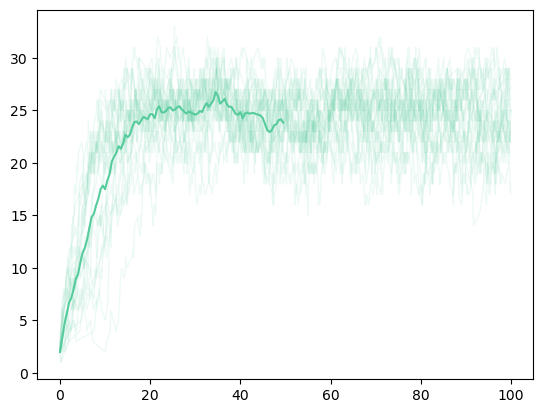

In [237]:
# Scale free network
G = nx.karate_club_graph()
β=0.1
μ=0.1

nodelist = G.nodes()
Y0 = np.array([1 if node<2 else 0 for node in nodelist]) # First 10 nodes, are infected with probability 1, 
                                                          # the rest with probability 0
X0 = np.array(nodelist)[Y0==1] 
#Plot Each simulation, but almos transparent alpha=0.1
sim=AveSIS_initinf(G, 'Simulations', colors[2],  20, 50,X0)


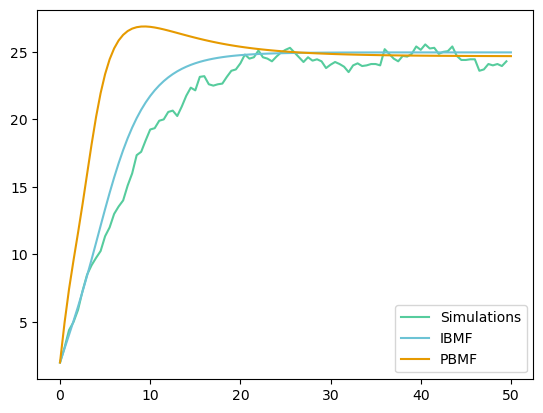

In [239]:
sim=AveSIS_initinf(G, 'Simulations', colors[2],  20, 50,X0,variance=False)

# Numerical integration of Master Equation with Pair based approximation
t_I, S_I, I_I = EoN.SIS_individual_based(G, β, μ, nodelist=nodelist, Y0 = Y0, tmax = 50, tcount = 101)
plt.plot(t_I,I_I,colors[1],label='IBMF')

# Numerical integration of Master Equation with Pair based approximation
t_B, S_B, I_B = EoN.SIS_pair_based(G, β, μ, nodelist=nodelist, Y0 = Y0, tmax = 50, tcount = 101)
plt.plot(t_B,I_B,colors[3],label='PBMF')

plt.legend()
plt.show()

In [33]:
Ave_tinf=0
node=19
count=1000
for cnt in range(count):    # Do many simulations       
        sim = EoN.fast_SIS(G, β, μ, initial_infecteds = X0,return_full_data=True)
        try:
                inf=sim.node_history(node)[1].index('I') # posición del primer tiempo de infección
                tinf=sim.node_history(node)[0][inf]
                Ave_tinf+=tinf
        except:
                pass
Ave_tinf /= count
Ave_tinf

5.0327298407279

In [31]:
T_B=t_B[[list(I_B).index(i) for i in I_B if 0.46<=i/G.number_of_nodes()<=0.54][0]]
T_I=t_I[[list(I_I).index(i) for i in I_I if 0.46<=i/G.number_of_nodes()<=0.54][1]]
print(T_B,T_I)

3.0 6.5


# Study the equilibrium of SIS epidemic for different values of $\lambda = \beta/\mu$ in two topologies: Erdos-Renyi and Scale Free networks.

- Create to large networks (N=1000) with the same average degree $<k> = 6$.
- Plot the fraction of infected individuals in the steady state, for both networks, as a function of $\lambda$
- Do they have the same epidemic threshold. Why?
- Which of the epidemic thresholds is closer to the mean field prediction $\lambda_c = \frac{<k>}{<k^2>}$

In [151]:
# Defining the parameters

colors = ['#ff7851','#6cc3d5','#56cc9d','#E69A00', '#CD9AB3', '#0073B3',
        '#F0E442']

rho = 0.2   # Fraction of the system that start infected at t=0
target_k = 6  # the mean value of the degree, in all three distributions
N = 1000     # the size of the networks
β = 0.5       # link transmission rate
μ = 1        # node recovery rate
count = 20   # number of simulations to run for each

GPow=generate_network(PkPowLaw, N)
GPoiss=generate_network(PkPoisson,N)
def steady_infecteds(sim):
    return sim[1][-1]


In [ ]:
def AveSIS(G,name, color, count, Tmax,variance=True,plot=True):
    
    report_times = (Tmax/100.0)*np.array(range(100)) # used to generate regular time-interval sequences
    
    sums = 0*report_times # used to compute the average

    for cnt in range(count):    # Do many simulations
        t, _, I = EoN.fast_SIS(G, β, μ, rho=rho)
        
        if variance:
            if plot:
                plt.plot(t, I*1./N, '-', color = color, alpha = 0.1, linewidth=1)  
        
        subsampled_I = EoN.subsample(report_times, t, I)  # Make a sequence of I values, at regular times steps
        sums += subsampled_I*1./N                         # Add all I series, to make an average at the end.
    
    ave = sums/count   # Compute the average of all simulations.
    if plot:
        plt.plot(report_times, ave, color = color, label=name)

        
    return report_times, ave

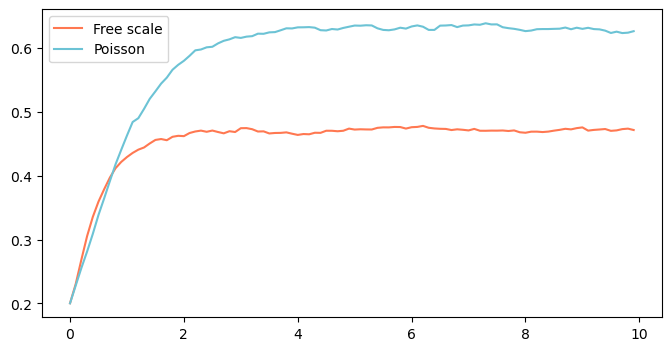

In [152]:
plt.figure(figsize=(8,4))

#Scale Free graph (Powerlaw)

simPow=AveSIS(GPow,'Free scale', colors[0], count,10,variance=False)

#Erdos Renyi graph (Poisson distribution)
simPoiss=AveSIS(GPoiss,'Poisson', colors[1],  count, 10,variance=False)

plt.legend()
plt.show()

In [153]:
β_list=list(np.arange(0.01,0.1,0.01))+list(np.arange(0.1,0.4,0.1))
β_dict_Poiss={}
β_dict_Pow={}

for β in β_list:

    #Scale Free graph (Powerlaw)
    simPow=AveSIS(GPow,'Free scale', colors[0], count,10,variance=False,plot=False)
    β_dict_Pow[β/μ]=steady_infecteds(simPow)

    #Erdos Renyi graph (Poisson distribution)
    simPoiss=AveSIS(GPoiss,'Poisson', colors[1],  count, 10,variance=False,plot=False)
    β_dict_Poiss[β/μ]=steady_infecteds(simPoiss)



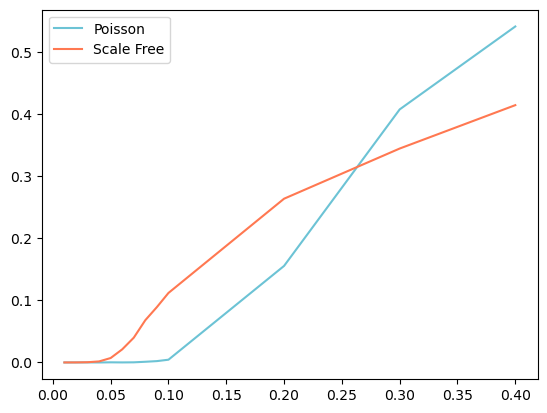

In [154]:
plt.plot(β_dict_Poiss.keys(),β_dict_Poiss.values(),color=colors[1],label='Poisson')
plt.plot(β_dict_Pow.keys(),β_dict_Pow.values(),color=colors[0],label='Scale Free')
plt.legend()
plt.show()

In [182]:
#Encontando el threshold exacto
list_th_poiss=[list(β_dict_Poiss.values()).index(i) for i in β_dict_Poiss.values() if i >=0.05] # Valores con infección >=0.05
list_th_pow=[list(β_dict_Pow.values()).index(i) for i in β_dict_Pow.values() if i >=0.05] # Valores con infección >=0.05
th_poiss=list(β_dict_Poiss.values())[min(list_th_poiss)]
th_pow=list(β_dict_Pow.values())[min(list_th_pow)]
print('Thresholds')
print('Poisson: '+ str(th_poiss),'| Scale free: '+str(th_pow))

Thresholds
Poisson: 0.15544999999999998 | Scale free: 0.06810000000000001


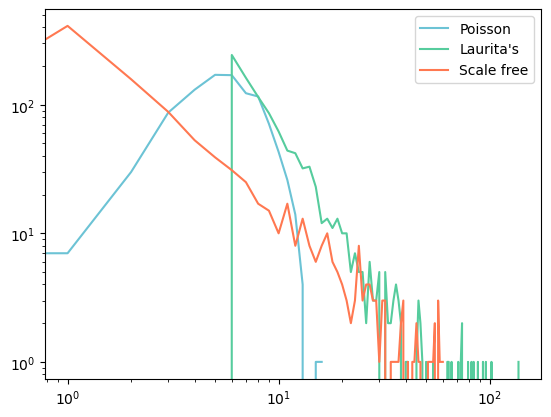

In [248]:
k_Poiss=nx.degree_histogram(GPoiss)
k_Pow=nx.degree_histogram(GPow)
Gp=nx.barabasi_albert_graph(N,6)
plt.plot(k_Poiss,color=colors[1],label='Poisson')
plt.plot(nx.degree_histogram(Gp),color=colors[2],label="Laurita's")
plt.plot(k_Pow,color=colors[0],label='Scale free')
plt.legend()
plt.show()

In [227]:
k_mean_poiss=sum([i*k_Poiss[i] for i in range(0,len(k_Poiss))])/N
k_mean_pow=sum([i*k_Pow[i] for i in range(0,len(k_Pow))])/N
k_meansc_poiss=sum([(i**2)*k_Poiss[i] for i in range(0,len(k_Poiss))])/N
k_meansc_pow=sum([(i**2)*k_Pow[i] for i in range(0,len(k_Pow))])/N


In [233]:
print('<K>/<K^2>')
print('Poisson: '+ str(k_mean_poiss/k_meansc_poiss),'| Scale free: '+str(k_mean_pow/k_meansc_pow))
print('Thresholds')
print('Poisson: '+ str(th_poiss),'| Scale free: '+str(th_pow))


<K>/<K^2>
Poisson: 0.14164083105825737 | Scale free: 0.048006441115789125
Thresholds
Poisson: 0.15544999999999998 | Scale free: 0.06810000000000001
